From all mice, look at different onsets of investigations and the associated response

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from experiment_class import Experiment
from bouts_extension import *

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac_csvs"
brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\mpfc_csvs"
# brain_region = '#FFAF00'

In [3]:
experiment = Experiment(experiment_path, csv_base_path)

experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\n5-240916-092748\Notes.txt
read from t=0s to t=868.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\n6-240916-102216\Notes.txt
read from t=0s to t=860.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\n7-240916-113157\Notes.txt
read from t=0s to t=862.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn1-250223-100216\Notes.txt
read from t=0s to t=866.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn2-250223-102714\Notes.txt
read from t=0s to t=861.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac\nn3-250223-105155\Notes.txt
read from t=0s to t=864.35s
F

In [4]:
bout_definitions = [
    {'prefix': 'bully', 'introduced': 'Subject_Introduced', 'removed': 'Subject_Removed'}
]
experiment.group_extract_manual_annotations(bout_definitions,first_only=False)

Processing behaviors for n5-240916-092748...
Processing behaviors for n6-240916-102216...
Processing behaviors for n7-240916-113157...
Processing behaviors for nn1-250223-100216...
Processing behaviors for nn2-250223-102714...
Processing behaviors for nn3-250223-105155...
Processing behaviors for nn4-250223-111644...
Processing behaviors for nn5-250223-114717...
Processing behaviors for nn6-250223-120921...
Processing behaviors for nn7-250223-123200...
Processing behaviors for nn8-250223-125722...


In [5]:
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=False,
                                  max_bout_duration=10, 
                                  mode='standard',
                                  post_time = 30)


Computing DA metrics for n5-240916-092748 ...
Computing DA metrics for n6-240916-102216 ...
Computing DA metrics for n7-240916-113157 ...
Computing DA metrics for nn1-250223-100216 ...
Computing DA metrics for nn2-250223-102714 ...
Computing DA metrics for nn3-250223-105155 ...
Computing DA metrics for nn4-250223-111644 ...
Computing DA metrics for nn5-250223-114717 ...
Computing DA metrics for nn6-250223-120921 ...
Computing DA metrics for nn7-250223-123200 ...
Computing DA metrics for nn8-250223-125722 ...


In [6]:
exp_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['bully-1']
metadata_df = create_metadata_dataframe(exp_dict, behavior="Defeat", desired_bouts=desired_bouts)

In [8]:
metadata_df.head()

,Subject,Bout,Behavior,Total Investigation Time,Average Bout Duration
0,n5,bully-1,Defeat,155.0,7.750000
1,n6,bully-1,Defeat,242.2,9.315385
2,n7,bully-1,Defeat,61.1,2.909524
3,nn1,bully-1,Defeat,175.7,14.641667
4,nn2,bully-1,Defeat,116.2,11.620000


In [9]:
total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")

Total Average Bout Duration: 8.3243


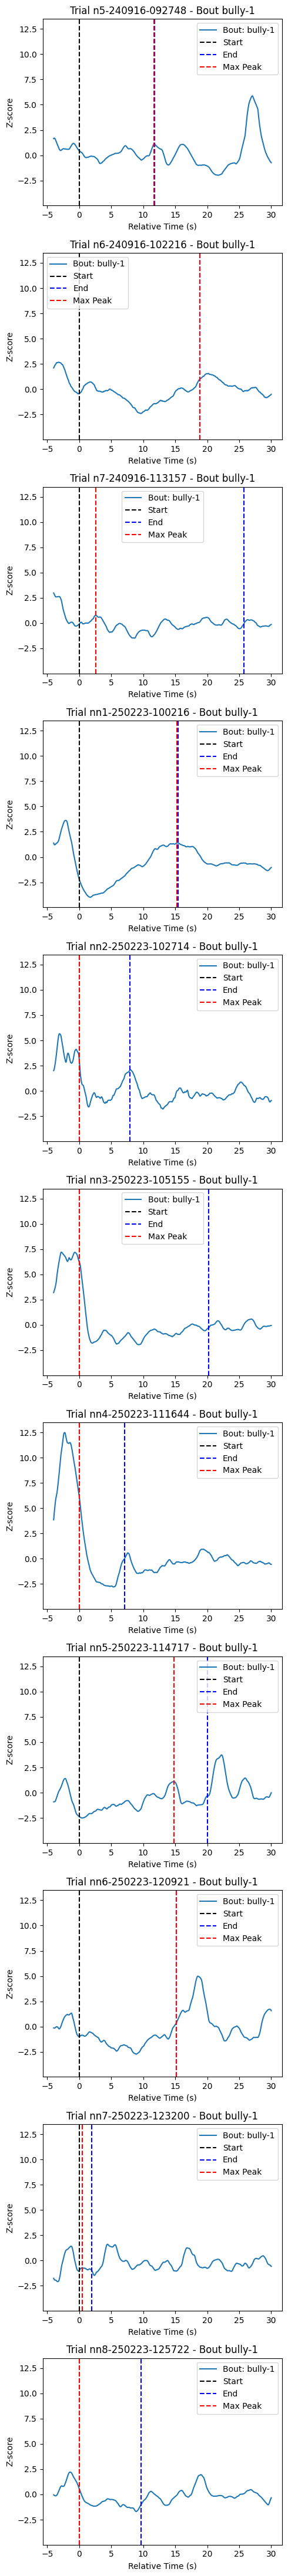

In [10]:
desired_bouts = ['bully-1']
experiment.plot_first_behavior_PETHs(selected_bouts=desired_bouts, behavior="Defeat")